In [1]:
import numpy as np
import pandas as pd
from numpy import loadtxt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error
from statistics import mean
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('AAPLs.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-07-31,37.474998,37.582500,37.032501,37.182499,35.199409,79383600
1,2017-08-01,37.275002,37.555000,37.102501,37.512501,35.511822,141474400
2,2017-08-02,39.820000,39.937500,39.040001,39.285000,37.189777,279747200
3,2017-08-03,39.262501,39.302502,38.755001,38.892502,36.818214,108389200
4,2017-08-04,39.017502,39.349998,38.922501,39.097500,37.012280,82239600
...,...,...,...,...,...,...,...
1254,2022-07-25,154.009995,155.039993,152.279999,152.949997,152.949997,53623900
1255,2022-07-26,152.259995,153.089996,150.800003,151.600006,151.600006,55138700
1256,2022-07-27,152.580002,157.330002,152.160004,156.789993,156.789993,78620700
1257,2022-07-28,156.979996,157.639999,154.410004,157.350006,157.350006,81378700


In [3]:
data = df["Adj Close"].values.tolist()
data

[35.199409,
 35.511822,
 37.189777,
 36.818214,
 37.01228,
 37.585003,
 37.885582,
 38.117519,
 36.9034,
 37.416611,
 37.979702,
 38.395512,
 38.241047,
 37.506893,
 37.42136,
 37.352455,
 37.963074,
 38.010593,
 37.841904,
 37.982086,
 38.364613,
 38.706749,
 38.811291,
 38.965725,
 38.977604,
 38.509556,
 38.469158,
 38.314724,
 37.689838,
 38.371742,
 38.219681,
 37.93219,
 37.606686,
 37.986835,
 37.699352,
 37.713589,
 37.081596,
 36.444836,
 36.088444,
 35.770061,
 36.385437,
 36.644417,
 36.418694,
 36.618279,
 36.544632,
 36.703815,
 36.466217,
 36.920021,
 36.89864,
 37.026943,
 37.041206,
 37.195644,
 37.064964,
 37.300182,
 37.986835,
 38.127007,
 37.958321,
 37.060204,
 37.124367,
 37.105358,
 37.326321,
 37.162373,
 37.399975,
 38.740009,
 39.611992,
 40.163212,
 39.652382,
 39.942249,
 40.985294,
 41.401093,
 41.534138,
 41.873909,
 41.788383,
 41.65007,
 41.483154,
 40.856033,
 40.317135,
 40.798798,
 40.572281,
 40.531731,
 41.28524,
 41.719227,
 41.721603,
 41.511776,


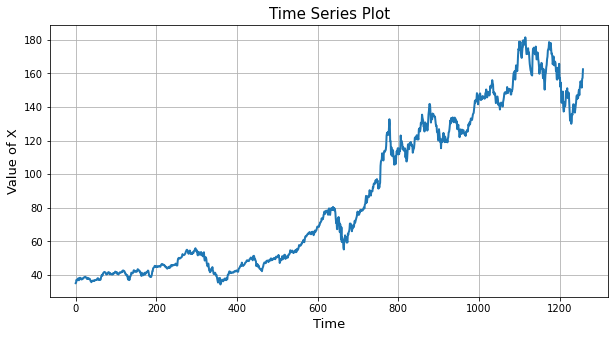

In [39]:
def plot_series(data, title='Time Series Plot', y_label='Value of X'):
    fig = plt.figure(figsize=(10,5))
    plt.plot(data, linewidth=2)
    plt.title(title, fontsize=15)
    plt.xlabel('Time', fontsize=13)
    plt.ylabel(y_label, fontsize=13)
    plt.grid()
    plt.show()
plotdata = plot_series(data)

In [40]:
data2 = np.array([[1,2,3,4,5,6,7,8]])
print(data2.shape)

(1, 8)


In [41]:
len(data)

1259

In [42]:
swv = 7
j=0
for i in range(len(data)-7):
    temp = []
    j = i+swv+1
    for k in range(i,j):
        temp.append(data[k])
    data2 = np.append(data2,[temp], axis=0)


In [43]:
print(data2)

[[  1.         2.         3.       ...   6.         7.         8.      ]
 [ 35.199409  35.511822  37.189777 ...  37.585003  37.885582  38.117519]
 [ 35.511822  37.189777  36.818214 ...  37.885582  38.117519  36.9034  ]
 ...
 [147.070007 151.       153.039993 ... 152.949997 151.600006 156.789993]
 [151.       153.039993 155.350006 ... 151.600006 156.789993 157.350006]
 [153.039993 155.350006 154.089996 ... 156.789993 157.350006 162.509995]]


In [44]:
type(data2)

numpy.ndarray

In [45]:
data2 = np.delete(data2, 0, axis=0)
data2

array([[ 35.199409,  35.511822,  37.189777, ...,  37.585003,  37.885582,
         38.117519],
       [ 35.511822,  37.189777,  36.818214, ...,  37.885582,  38.117519,
         36.9034  ],
       [ 37.189777,  36.818214,  37.01228 , ...,  38.117519,  36.9034  ,
         37.416611],
       ...,
       [147.070007, 151.      , 153.039993, ..., 152.949997, 151.600006,
        156.789993],
       [151.      , 153.039993, 155.350006, ..., 151.600006, 156.789993,
        157.350006],
       [153.039993, 155.350006, 154.089996, ..., 156.789993, 157.350006,
        162.509995]])

In [46]:
maindata = pd.DataFrame(data2)
maindata

,0,1,2,3,4,5,6,7
0,35.199409,35.511822,37.189777,36.818214,37.012280,37.585003,37.885582,38.117519
1,35.511822,37.189777,36.818214,37.012280,37.585003,37.885582,38.117519,36.903400
2,37.189777,36.818214,37.012280,37.585003,37.885582,38.117519,36.903400,37.416611
3,36.818214,37.012280,37.585003,37.885582,38.117519,36.903400,37.416611,37.979702
4,37.012280,37.585003,37.885582,38.117519,36.903400,37.416611,37.979702,38.395512
...,...,...,...,...,...,...,...,...
1247,148.470001,150.169998,147.070007,151.000000,153.039993,155.350006,154.089996,152.949997
1248,150.169998,147.070007,151.000000,153.039993,155.350006,154.089996,152.949997,151.600006
1249,147.070007,151.000000,153.039993,155.350006,154.089996,152.949997,151.600006,156.789993
1250,151.000000,153.039993,155.350006,154.089996,152.949997,151.600006,156.789993,157.350006


In [47]:
# normalize the dataset because LSTM are sensitive to scaling so ranging them in 0-1
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(maindata)
dataset

array([[0.00533781, 0.00746166, 0.01886876, ..., 0.02155559, 0.02359899,
        0.02517575],
       [0.00746166, 0.01886876, 0.0163428 , ..., 0.02359899, 0.02517575,
        0.01692191],
       [0.01886876, 0.0163428 , 0.0176621 , ..., 0.02517575, 0.01692191,
        0.02041083],
       ...,
       [0.765858  , 0.79257493, 0.80644324, ..., 0.80583143, 0.7966539 ,
        0.83193654],
       [0.79257493, 0.80644324, 0.8221472 , ..., 0.7966539 , 0.83193654,
        0.83574363],
       [0.80644324, 0.8221472 , 0.81358139, ..., 0.83193654, 0.83574363,
        0.87082234]])

In [48]:
# split into train and test sets
train_size = int(len(dataset) * 0.70)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

876 376


In [49]:
#spearating features and labels for training data
train = pd.DataFrame(train)
train_x = train.drop(train.columns[7], axis=1)
train_y = pd.DataFrame(train.loc[:,7])
train_x,train_y

(            0         1         2         3         4         5         6
 0    0.005338  0.007462  0.018869  0.016343  0.017662  0.021556  0.023599
 1    0.007462  0.018869  0.016343  0.017662  0.021556  0.023599  0.025176
 2    0.018869  0.016343  0.017662  0.021556  0.023599  0.025176  0.016922
 3    0.016343  0.017662  0.021556  0.023599  0.025176  0.016922  0.020411
 4    0.017662  0.021556  0.023599  0.025176  0.016922  0.020411  0.024239
 ..        ...       ...       ...       ...       ...       ...       ...
 871  0.634649  0.622722  0.627371  0.655671  0.688283  0.703107  0.729049
 872  0.622722  0.627371  0.655671  0.688283  0.703107  0.729049  0.730666
 873  0.627371  0.655671  0.688283  0.703107  0.729049  0.730666  0.723254
 874  0.655671  0.688283  0.703107  0.729049  0.730666  0.723254  0.689766
 875  0.688283  0.703107  0.729049  0.730666  0.723254  0.689766  0.655200
 
 [876 rows x 7 columns],
             7
 0    0.025176
 1    0.016922
 2    0.020411
 3    0.02423

In [50]:
##spearating features and labels for testing data
test=pd.DataFrame(test)
test_x = test.drop(test.columns[7], axis=1)
test_y = pd.DataFrame(test.loc[:,7])
test_x,test_y

(            0         1         2         3         4         5         6
 0    0.703107  0.729049  0.730666  0.723254  0.689766  0.655200  0.669889
 1    0.729049  0.730666  0.723254  0.689766  0.655200  0.669889  0.675616
 2    0.730666  0.723254  0.689766  0.655200  0.669889  0.675616  0.668541
 3    0.723254  0.689766  0.655200  0.669889  0.675616  0.668541  0.691787
 4    0.689766  0.655200  0.669889  0.675616  0.668541  0.691787  0.688919
 ..        ...       ...       ...       ...       ...       ...       ...
 371  0.775375  0.786932  0.765858  0.792575  0.806443  0.822147  0.813581
 372  0.786932  0.765858  0.792575  0.806443  0.822147  0.813581  0.805831
 373  0.765858  0.792575  0.806443  0.822147  0.813581  0.805831  0.796654
 374  0.792575  0.806443  0.822147  0.813581  0.805831  0.796654  0.831937
 375  0.806443  0.822147  0.813581  0.805831  0.796654  0.831937  0.835744
 
 [376 rows x 7 columns],
             7
 0    0.675616
 1    0.668541
 2    0.691787
 3    0.68891

In [51]:

rows=train_x.shape[0] 
testrows = test_x.shape[0]
rows,testrows

(876, 376)

In [52]:
#to reshape change df to np array

train_x = train_x.to_numpy()
train_y = train_y.to_numpy()
test_x =  test_x.to_numpy()
# test_y =  test_y.to_numpy()

In [53]:
# reshape input to be [batch, time steps, features]
train_x = train_x.reshape(rows,swv,1)
train_y = train_y.reshape(rows,1,1)

In [54]:
test_x = test_x.reshape(testrows,swv,1)
# test_y = test_y.reshape(testrows,1)

In [55]:
# create and fit the LSTM network
actf='relu'
model = Sequential()
model.add(LSTM(40, input_shape=(swv,1), return_sequences=True, activation=actf, name="layer1"))
model.add(LSTM(40,return_sequences=True, activation=actf, name="layer2"))
model.add(LSTM(40,activation=actf, name="layer3"))
model.add(Dense(1, name="outputlayer")) 
print(model.summary())
model.compile(loss="mean_absolute_error", optimizer="adam", metrics= ['mse'])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (LSTM)               (None, 7, 40)             6720      
                                                                 
 layer2 (LSTM)               (None, 7, 40)             12960     
                                                                 
 layer3 (LSTM)               (None, 40)                12960     
                                                                 
 outputlayer (Dense)         (None, 1)                 41        
                                                                 
Total params: 32,681
Trainable params: 32,681
Non-trainable params: 0
_________________________________________________________________
None


In [56]:
epochs=200    # try 50,100,150,200
batch_size=32   # 20,32,64
history=model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, verbose=1, validation_split=0.1)



Epoch 1/200
25/25 [==============================] - 7s 40ms/step - loss: 0.1086 - mse: 0.0267 - val_loss: 0.4475 - val_mse: 0.2031
Epoch 2/200
25/25 [==============================] - 0s 13ms/step - loss: 0.0759 - mse: 0.0135 - val_loss: 0.2620 - val_mse: 0.0701
Epoch 3/200
25/25 [==============================] - 0s 12ms/step - loss: 0.0222 - mse: 0.0012 - val_loss: 0.0521 - val_mse: 0.0036
Epoch 4/200
25/25 [==============================] - 0s 15ms/step - loss: 0.0143 - mse: 4.8598e-04 - val_loss: 0.0373 - val_mse: 0.0021
Epoch 5/200
25/25 [==============================] - 0s 13ms/step - loss: 0.0123 - mse: 3.9415e-04 - val_loss: 0.0316 - val_mse: 0.0014
Epoch 6/200
25/25 [==============================] - 0s 12ms/step - loss: 0.0114 - mse: 3.5815e-04 - val_loss: 0.0325 - val_mse: 0.0017
Epoch 7/200
25/25 [==============================] - 0s 14ms/step - loss: 0.0128 - mse: 3.8202e-04 - val_loss: 0.0299 - val_mse: 0.0014
Epoch 8/200
25/25 [==============================] - 0s 15ms

25/25 [==============================] - 0s 12ms/step - loss: 0.0099 - mse: 2.4082e-04 - val_loss: 0.0214 - val_mse: 7.0313e-04
Epoch 61/200
25/25 [==============================] - 0s 13ms/step - loss: 0.0111 - mse: 2.8710e-04 - val_loss: 0.0204 - val_mse: 6.4320e-04
Epoch 62/200
25/25 [==============================] - 0s 12ms/step - loss: 0.0101 - mse: 2.5577e-04 - val_loss: 0.0207 - val_mse: 6.5500e-04
Epoch 63/200
25/25 [==============================] - 0s 14ms/step - loss: 0.0101 - mse: 2.4020e-04 - val_loss: 0.0215 - val_mse: 7.7667e-04
Epoch 64/200
25/25 [==============================] - 0s 12ms/step - loss: 0.0099 - mse: 2.3466e-04 - val_loss: 0.0202 - val_mse: 6.3567e-04
Epoch 65/200
25/25 [==============================] - 0s 12ms/step - loss: 0.0109 - mse: 2.6450e-04 - val_loss: 0.0266 - val_mse: 0.0010
Epoch 66/200
25/25 [==============================] - 0s 12ms/step - loss: 0.0105 - mse: 2.4866e-04 - val_loss: 0.0197 - val_mse: 6.6360e-04
Epoch 67/200
25/25 [==========

25/25 [==============================] - 0s 12ms/step - loss: 0.0089 - mse: 1.9357e-04 - val_loss: 0.0197 - val_mse: 5.8576e-04
Epoch 119/200
25/25 [==============================] - 0s 12ms/step - loss: 0.0089 - mse: 1.7696e-04 - val_loss: 0.0219 - val_mse: 7.0432e-04
Epoch 120/200
25/25 [==============================] - 0s 12ms/step - loss: 0.0086 - mse: 1.7711e-04 - val_loss: 0.0197 - val_mse: 6.7262e-04
Epoch 121/200
25/25 [==============================] - 0s 12ms/step - loss: 0.0086 - mse: 1.7828e-04 - val_loss: 0.0178 - val_mse: 5.0491e-04
Epoch 122/200
25/25 [==============================] - 0s 12ms/step - loss: 0.0084 - mse: 1.7248e-04 - val_loss: 0.0192 - val_mse: 5.6392e-04
Epoch 123/200
25/25 [==============================] - 0s 12ms/step - loss: 0.0091 - mse: 2.0264e-04 - val_loss: 0.0273 - val_mse: 0.0011
Epoch 124/200
25/25 [==============================] - 0s 12ms/step - loss: 0.0097 - mse: 2.0574e-04 - val_loss: 0.0172 - val_mse: 5.1555e-04
Epoch 125/200
25/25 [===

Epoch 176/200
25/25 [==============================] - 0s 12ms/step - loss: 0.0078 - mse: 1.4102e-04 - val_loss: 0.0206 - val_mse: 6.2619e-04
Epoch 177/200
25/25 [==============================] - 0s 12ms/step - loss: 0.0084 - mse: 1.5704e-04 - val_loss: 0.0197 - val_mse: 5.7480e-04
Epoch 178/200
25/25 [==============================] - 0s 11ms/step - loss: 0.0075 - mse: 1.4145e-04 - val_loss: 0.0158 - val_mse: 4.2982e-04
Epoch 179/200
25/25 [==============================] - 0s 12ms/step - loss: 0.0072 - mse: 1.3166e-04 - val_loss: 0.0165 - val_mse: 4.3950e-04
Epoch 180/200
25/25 [==============================] - 0s 15ms/step - loss: 0.0081 - mse: 1.5170e-04 - val_loss: 0.0188 - val_mse: 5.2819e-04
Epoch 181/200
25/25 [==============================] - 0s 16ms/step - loss: 0.0073 - mse: 1.3493e-04 - val_loss: 0.0174 - val_mse: 4.8054e-04
Epoch 182/200
25/25 [==============================] - 0s 18ms/step - loss: 0.0083 - mse: 1.5081e-04 - val_loss: 0.0200 - val_mse: 5.9622e-04
Epoch 

In [57]:
# evaluate the keras model
_,mse = model.evaluate(train_x,train_y)
print('mse: %.4f' % (mse))

28/28 [==============================] - 0s 8ms/step - loss: 0.0084 - mse: 1.7120e-04
mse: 0.0002


In [58]:
train_loss=history.history['loss']
train_loss

[0.10857223719358444,
 0.0759177953004837,
 0.022177161648869514,
 0.014265540055930614,
 0.012298108078539371,
 0.01142607256770134,
 0.0128265880048275,
 0.011930257081985474,
 0.012195860967040062,
 0.012087227776646614,
 0.011941783130168915,
 0.011503798887133598,
 0.012362560257315636,
 0.012095602229237556,
 0.013539778999984264,
 0.011910662055015564,
 0.012039014138281345,
 0.011827929876744747,
 0.012033983133733273,
 0.011798633262515068,
 0.011673045344650745,
 0.011729567311704159,
 0.011226168833673,
 0.011477773077785969,
 0.011984579265117645,
 0.01285520289093256,
 0.011998115107417107,
 0.011264081113040447,
 0.010937273502349854,
 0.011311803013086319,
 0.011622057296335697,
 0.010936802253127098,
 0.011262998916208744,
 0.010878915898501873,
 0.011211710050702095,
 0.011079327203333378,
 0.010963871143758297,
 0.011164603754878044,
 0.011323334649205208,
 0.01081144344061613,
 0.01221670676022768,
 0.011503374204039574,
 0.01088155061006546,
 0.011394220404326916,
 

In [59]:
val_mse=history.history['val_mse']
val_mse
mean(val_mse)

0.002184074904798763

In [60]:
test_x
type(train_x[0][0])

numpy.ndarray

In [61]:
#predict
predict_y = model.predict(test_x)

12/12 [==============================] - 1s 5ms/step


In [62]:
mean_squared_error(test_y,predict_y)


0.0005985686665295025

([<matplotlib.lines.Line2D at 0x264372866a0>],
 [<matplotlib.lines.Line2D at 0x26437286820>])

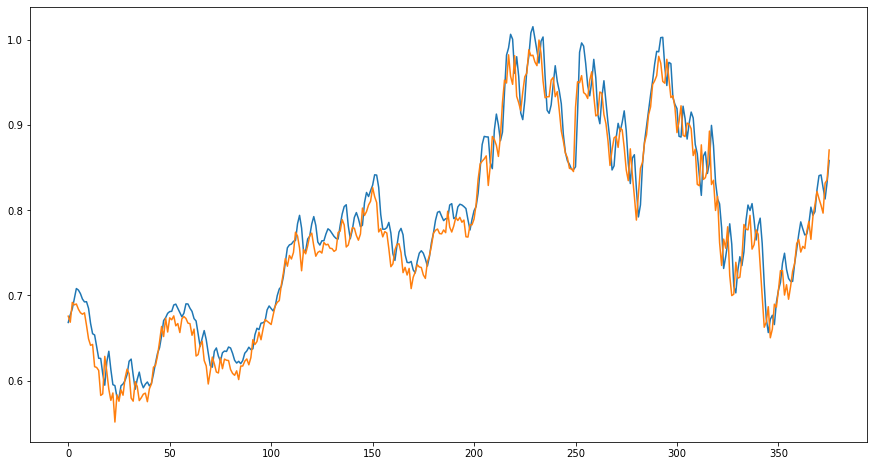

In [77]:
plt.figure(figsize=(15,8))
plt.plot(predict_y), plt.plot(test_y)